In [ ]:
#!pip install seaborn

In [1]:
import pandas as pd
import seaborn as sns
import json

from src.utils.files import save_to_pickle
from src.utils.pandas import put_df_name

from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_context("talk")  

DEFAULT_FIGSIZE=(20,8)

In [2]:
filename = "data/lastfm-dataset-1K/userid-timestamp-artid-artname-traid-traname.tsv"

In [3]:
plays = pd.read_table(filename, usecols=[0, 1, 2, 4], names=['user_id', 'timestamp', 'artist_id', 'track_id'])
plays = put_df_name(plays, "plays")

# Analizando el dataset

In [4]:
plays.head()

,user_id,timestamp,artist_id,track_id
0,user_000001,2009-05-04T23:08:57Z,f1b1cf71-bd35-4e99-8624-24a6e15f133a,NaN
1,user_000001,2009-05-04T13:54:10Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,NaN
2,user_000001,2009-05-04T13:52:04Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,NaN
3,user_000001,2009-05-04T13:42:52Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,NaN
4,user_000001,2009-05-04T13:42:11Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,NaN


In [5]:
plays.describe()

,user_id,timestamp,artist_id,track_id
count,19098862,19098862,18498009,16936136
unique,992,17454739,107295,960402
top,user_000949,2009-02-26T21:29:15Z,a74b1b7f-71a5-4011-9441-d0b5e4122711,db16d0b3-b8ce-4aa8-a11a-e4d53cc7f8a6
freq,183103,248,115099,3991


# Campos vacios

In [6]:
def count_null(df):
    null_count={}
    for col in df.columns:
         null_count[col] = df[col].isnull().sum()/len(df)
    return null_count

count_null(plays)

{'user_id': 0.0,
 'timestamp': 0.0,
 'artist_id': 0.0314601466830851,
 'track_id': 0.11323847462744116}

# Drop filas Nan

In [7]:
plays = plays.dropna()

# Valores unicos

In [8]:
def count_unique(df):
    unique_count = {}
    for c in df.columns:
        unique_count[c] = df[c].unique().size
    return unique_count

count_unique(plays)

{'user_id': 992, 'timestamp': 15631468, 'artist_id': 83905, 'track_id': 960402}

In [9]:
def plot_distribution(df, column, elements="", xlim=None):
    
    values = df[column].value_counts()
    
    if elements:
        values.name = f"{elements} count"
        elements = f"of {elements} "
        
    fig, (ax1, ax2) = plt.subplots(figsize=DEFAULT_FIGSIZE, ncols=2)
    if xlim is not None:
        ax1.set(xlim=xlim)
        ax2.set(xlim=xlim)
    
    sns.distplot(values, ax=ax1,norm_hist=False, kde=False, bins=xlim[1] if xlim else None)\
                .set_title(f"{df.metadata_df_name} - Distribution {elements}per {column}")
    
    sns.distplot(values, ax=ax2, 
                 norm_hist=True, 
                 hist_kws=dict(cumulative=True), 
                 kde=False, bins=xlim[1] if xlim else None)\
                .set_title(f"{df.metadata_df_name} - Cumulative Distribution {elements}per {column}")    


# Usuarios x cancion

/home/jorge/anaconda3/envs/labdac/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


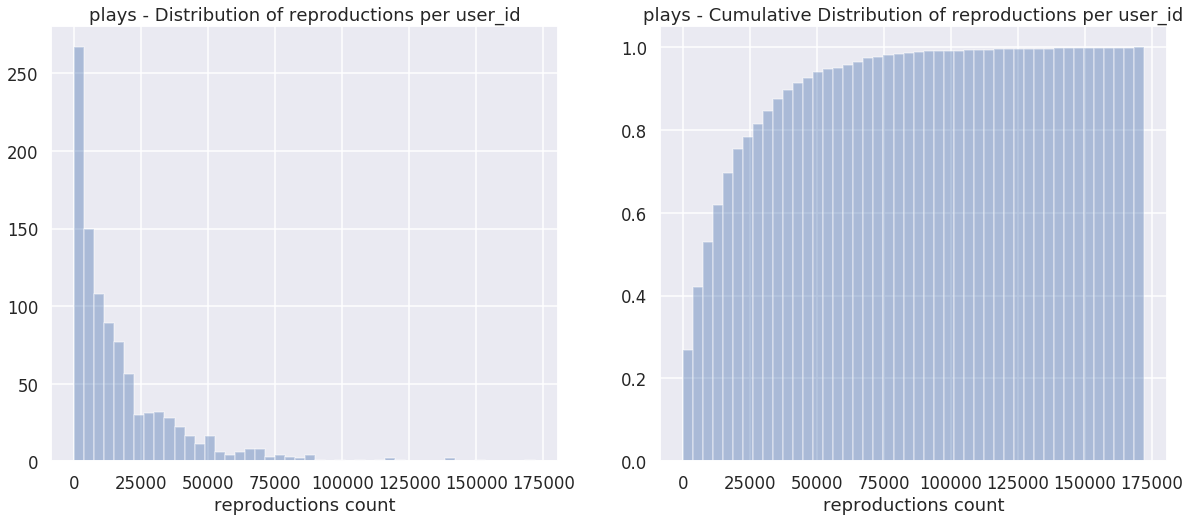

In [10]:
plot_distribution(plays, column="user_id", elements="reproductions")

# Canciones reproducidas 

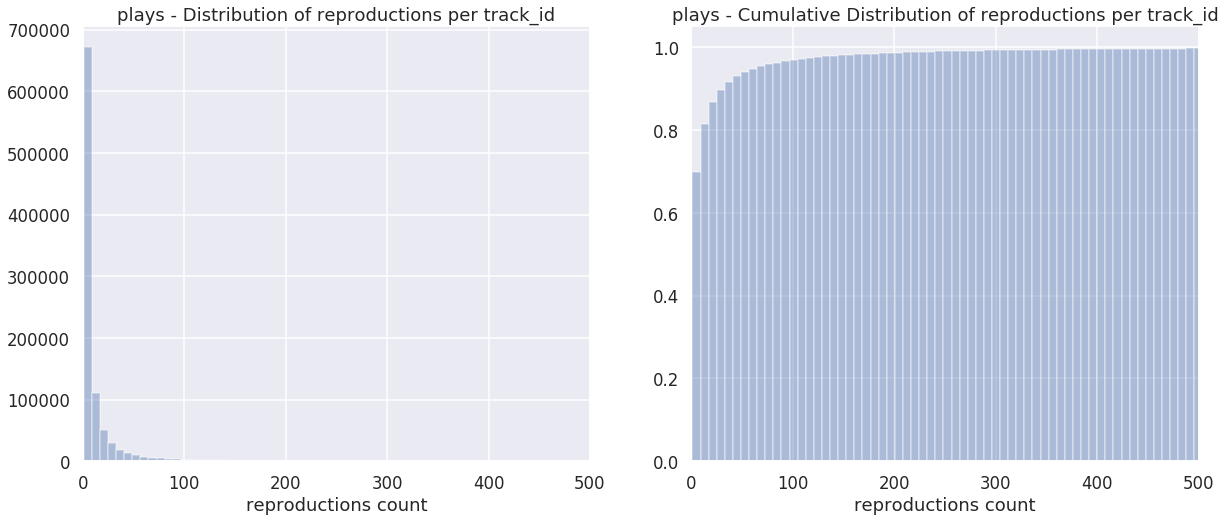

In [11]:
plot_distribution(plays, column="track_id", elements="reproductions",xlim=(0,500))

# Artistas Reproducidos

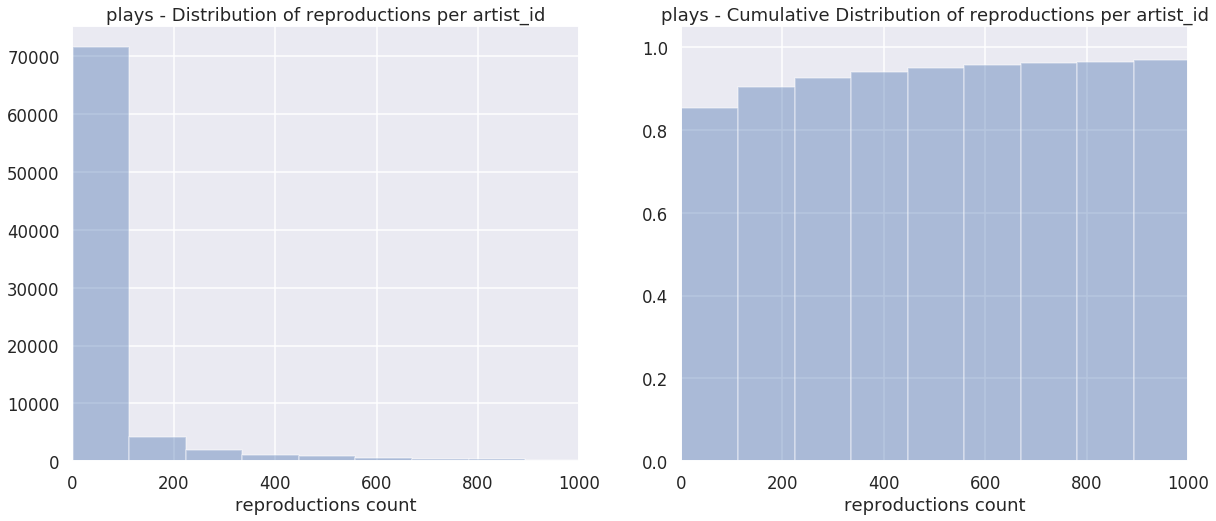

In [12]:
plot_distribution(plays, column="artist_id", elements="reproductions", xlim=(0,1000))

# Armando Sessiones

In [16]:
plays["timestamp"] = pd.to_datetime(plays["timestamp"])
user_id_group = plays.sort_values("timestamp").groupby("user_id")

In [17]:
delta = pd.Timedelta('800s')

def aux(row):
    sesstions = []
    session = []
    last_time = None
    for timestamp,track_id in zip(row["timestamp"], row["track_id"]):
        if last_time == None or timestamp - last_time < delta:
            session.append((timestamp, track_id))
        else:
            sesstions.append(session)
            session = []
            
        last_time = timestamp
    return sesstions

asd = user_id_group.apply(aux)

In [18]:
all_sessions = []
for a in asd:
    for s in a:
        all_sessions.append(s)

In [19]:
len(all_sessions)

1345697

In [21]:
all_sessions[:2]

[[(Timestamp('2006-08-13 13:59:20'), 'c4633ab1-e715-477f-8685-afa5f2058e42'),
  (Timestamp('2006-08-13 14:03:29'), 'bc2765af-208c-44c5-b3b0-cf597a646660'),
  (Timestamp('2006-08-13 14:10:43'), 'aa9c5a80-5cbe-42aa-a966-eb3cfa37d832'),
  (Timestamp('2006-08-13 14:17:40'), 'd9b1c1da-7e47-4f97-a135-77260f2f559d'),
  (Timestamp('2006-08-13 14:19:06'), '120bb01c-03e4-465f-94a0-dce5e9fac711'),
  (Timestamp('2006-08-13 14:23:03'), '777ac51f-8ffc-4c44-92b6-a2c75cbc6915')],
 [(Timestamp('2006-08-13 14:55:14'), '8e81302a-6cde-4818-8703-43b5356ce0a0'),
  (Timestamp('2006-08-13 14:59:59'), '1c0377bb-c00b-4bbe-b4b2-615f13324adc'),
  (Timestamp('2006-08-13 15:05:20'), '8f916d23-0510-4ad5-9a7f-8a076c3f14ca'),
  (Timestamp('2006-08-13 15:12:12'), '9f51e011-56cf-459e-9077-e928bbb13ff4'),
  (Timestamp('2006-08-13 15:17:35'), '4c7d5a2c-e1da-4fe3-96e3-c40a7a6f59e8'),
  (Timestamp('2006-08-13 15:23:08'), '6cb57d5e-da03-4bcd-b7b5-b08023890b42'),
  (Timestamp('2006-08-13 15:28:44'), '8349030c-a3ab-4ced-9064-8

In [24]:
save_to_pickle(all_sessions, "data/last_fm_sessions_800s")